In [23]:
QuantumBilliards[\[CapitalOmega]_, levnumber_] := 
    NDEigensystem[
        {-Laplacian[u[x, y], {x, y}], DirichletCondition[u[x, y] == 0, True]},
        u[x, y], {x, y} \[Element] \[CapitalOmega], levnumber,
        Method -> {
            "SpatialDiscretization" -> {"FiniteElement", {"MeshOptions" -> {"MaxCellMeasure" -> 0.0001}}},
            "Eigensystem" -> {"Arnoldi", "MaxIterations" -> Infinity}
        }
    ];

In [16]:
QuantumBilliardsEigenval[\[CapitalOmega]_, levnumber_] := 
    NDEigenvalues[
        {-Laplacian[u[x, y], {x, y}], DirichletCondition[u[x, y] == 0, True]},
        u[x, y], {x, y} \[Element] \[CapitalOmega], levnumber, 
        Method -> {"SpatialDiscretization" -> {"FiniteElement", {"MeshOptions" -> {"MaxCellMeasure" -> 0.0001}}}, 
        "Eigensystem" -> {"Arnoldi", "MaxIterations" -> Infinity}}
        ];

In [24]:
jet[u_?NumericQ] := 
    Blend[{
        {0, RGBColor[0, 0, 9/16]}, 
        {1/9, Blue}, 
        {23/63, Cyan}, 
        {13/21, Yellow}, 
        {47/63, Orange}, 
        {55/63, Red}, 
        {1, RGBColor[1/2, 0, 0]}
    }, u] /; 0 <= u <= 1

In [14]:
(* Making uniform 10^5 data for Plotting Probability density *)
DummyDataGenerator[\[CapitalOmega]_] := 
    Module[
        {mf, pts, col}, 
        mf = RegionMember[\[CapitalOmega]];
        pts = RandomVariate[UniformDistribution[RegionBounds[\[CapitalOmega]]], 10^5];
        mpts = Select[pts, RegionMember[\[CapitalOmega]]];
        col = mf[mpts] /. True -> Red;
        Graphics[{AbsolutePointSize[1], {col, Point /@ mpts}\[Transpose]}, Axes -> True]
    ]

In [17]:
ProbabilityDensityfunctions[Eigvals_, Eigenfunction_, eigennum_, viewnum_] := 
    Module[
        {i},
        ProbDensity = Table[0, {i, 0, viewnum}];
        Table[
            ProbDensity[[i + 1]] = Flatten[List[# , (Eigenfunction[[eigennum + i]][[0]][#[[1]], #[[2]]])^2], 2] & /@ mpts;
            ListDensityPlot[
                ProbDensity[[i + 1]],
                ColorFunction -> (jet[(#)^.4] &),
                AspectRatio -> Automatic,(*PlotLegends\[Rule]Automatic,*)
                PlotRange -> All, 
                PlotLabel -> {eigennum + i, Eigvals[[eigennum + i]]}
            ], {i, 0, viewnum}
        ]
    ]

In [18]:
FullPDFimage[Eigvals_, Eigenfunction_, eigennum_, viewnum_] := 
    Module[
        {i, images},
        ProbDensity = Table[0, {i, 0, viewnum}];
        images = GraphicsGrid[{
            Table[
                ProbDensity[[i + 1]] = Flatten[List[# , (Eigenfunction[[eigennum + i]][[0]][#[[1]], #[[2]]])^2], 2] & /@ mpts ;
                ListDensityPlot[
                    ProbDensity[[i + 1]], 
                    ColorFunction -> (jet[(#)^.4] &), 
                    AspectRatio -> Automatic, 
                    PlotRange -> All, 
                    Frame -> False 
                ], {i, 0, viewnum}]
        }];
        Which[
            Eigvals === Bvals, 
            Table[
                Labeled[
                    ImageAssemble[{
                        {ImageReflect[ImageCrop[images[[1, 2, 1, i, 1]]], Left -> Right],
                         ImageCrop[images[[1, 2, 1, i, 1]]]}, 
                        {ImageReflect[ImageReflect[ImageCrop[images[[1, 2, 1, i, 1]]], Left -> Right], Bottom -> Top],
                         ImageReflect[ImageCrop[images[[1, 2, 1, i, 1]]], Bottom -> Top]}
                    }], {{eigennum + i - 1, Eigvals[[eigennum + i - 1]]}}, {Top}
                ], {i, 1, viewnum + 1}
            ],
            Eigvals === Cvals,
            Table[
                Labeled[
                    ImageAssemble[{
                        {ImageCrop[images[[1, 2, 1, i, 1]]]}, 
                        {ImageReflect[ImageCrop[images[[1, 2, 1, i, 1]]], Bottom -> Top]}
                    }], {{eigennum + i - 1, Eigvals[[eigennum + i - 1]]}}, {Top}
                ], {i, 1, viewnum + 1}
            ],
            Eigvals === Dvals,
            Table[
                Labeled[
                    ImageAssemble[{
                        ImageReflect[ImageCrop[images[[1, 2, 1, i, 1]]], Left -> Right],
                        ImageCrop[images[[1, 2, 1, i, 1]]]
                    }], {{eigennum + i - 1, Eigvals[[eigennum + i - 1]]}}, {Top}
                ], {i, 1, viewnum + 1}
            ]
        ]
    ]

## Bunimovich stadium billiard

-Graphics-
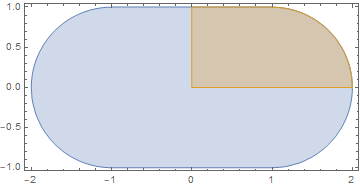

In [19]:
\[CapitalOmega]B = StadiumShape[{{-1, 0}, {1, 0}}, 1];
\[CapitalOmega]Bpart = RegionUnion[Rectangle[{0, 0}, {1, 1}], Disk[{1, 0}, 1, {0, Pi/2}]];

RegionPlot[{\[CapitalOmega]B, \[CapitalOmega]Bpart}, AspectRatio -> Automatic]

-Graphics-
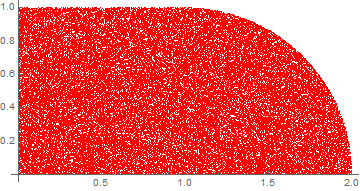

In [22]:
DummyDataGenerator[\[CapitalOmega]Bpart]

In [25]:
{Bvals, Bfuns} = QuantumBilliards[\[CapitalOmega]Bpart, 100];

{Labeled[-Image-, {{80, 639.369}}, {Top}], Labeled[-Image-, {{81, 643.122}}, {Top}], 
 
>   Labeled[-Image-, {{82, 655.036}}, {Top}], Labeled[-Image-, {{83, 660.637}}, {Top}], 
 
>   Labeled[-Image-, {{84, 662.153}}, {Top}], Labeled[-Image-, {{85, 666.195}}, {Top}], 
 
>   Labeled[-Image-, {{86, 676.968}}, {Top}], Labeled[-Image-, {{87, 685.78}}, {Top}], 
 
>   Labeled[-Image-, {{88, 696.355}}, {Top}], Labeled[-Image-, {{89, 701.28}}, {Top}], 
 
>   Labeled[-Image-, {{90, 712.115}}, {Top}]}
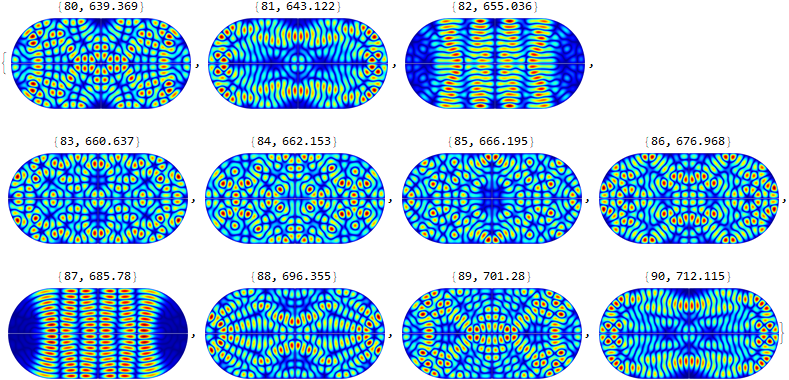

In [26]:
FullPDFimage[Bvals, Bfuns, 80, 10]